<a href="https://colab.research.google.com/github/NayibGS07/Diplomado_Ciencia_de_Datos/blob/main/Diplomado_Ciencia_de_Datos_2024/Ciencia_de_Datos_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIPLOMADO CIENCIA MATEMÁTICA DE DATOS

## MODULO: NEURONAL NETWORKS

## Libraries

In [1]:
#!pip install tensorflow==2.13.0

In [2]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping

## Perceptron

In [3]:
lr = 1 #learning rate
bias = 1 #value of bias
weights = [random.random(),random.random(),random.random()]

In [4]:
def Perceptron(input1, input2, output):
   outputP = input1*weights[0]+input2*weights[1]+bias*weights[2]
   if outputP > 0 : #activation function (here Heaviside)
      outputP = 1
   else :
      outputP = 0
   error = output - outputP
   weights[0] += error * input1 * lr
   weights[1] += error * input2 * lr
   weights[2] += error * bias * lr

In [5]:
for i in range(50) :
   Perceptron(1,1,1) #True or true
   Perceptron(1,0,1) #True or false
   Perceptron(0,1,1) #False or true
   Perceptron(0,0,0) #False or false

In [6]:
x = int(input())
y = int(input())
outputP = x*weights[0] + y*weights[1] + bias*weights[2]
if outputP > 0 : #activation function
   outputP = 1
else :
   outputP = 0
print(x, "or", y, "is : ", outputP)

1
1
1 or 1 is :  1


## Neuronal Network - Use Case

### Data Loading

In [8]:
df_1 = pd.read_csv('/content/mnist_train.csv', header = None)
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_2 = pd.read_csv('/content/mnist_test.csv', header = None)
df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = pd.concat([df_1, df_1])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Exploration

In [11]:
X = df.iloc[:, 1:]
Y = df[0]

In [12]:
X.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,2306.0,2306.0,2306.0,2306.0,2306.0,2306.0,2306.0,2306.0,2306.0,2306.0,...,2304.000000,2304.000000,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.276042,0.095486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.137762,3.240202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,223.000000,110.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
digit_count = Y.value_counts().reset_index()
digit_count.columns = ['digit', 'count']
fig = px.pie(digit_count, values = 'count', names = 'digit', title = 'Digit Percentage')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(showlegend = False)
fig.show()

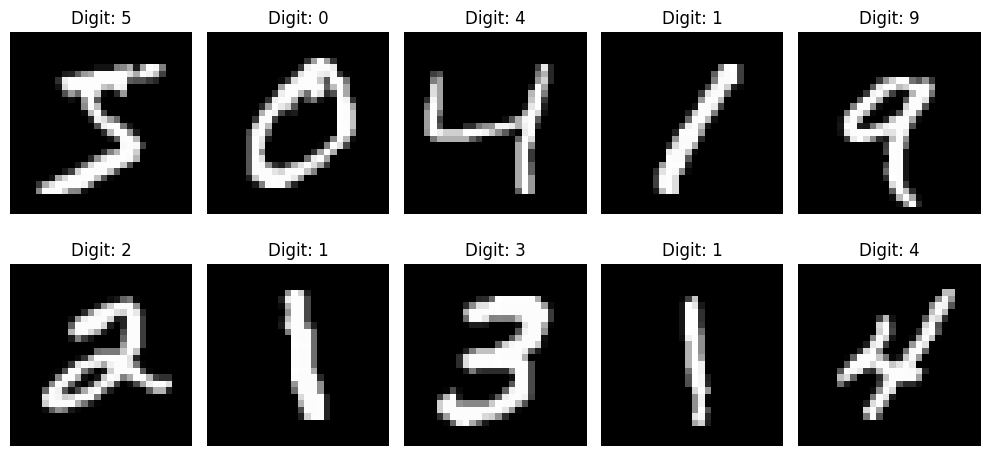

In [14]:
fig, axs = plt.subplots(2, 5, figsize = (10, 5))
for i in range (10):
  ax = axs[i // 5, i % 5]
  ax.imshow(np.array(X.iloc[i]).reshape(28, 28), cmap = 'gray')
  ax.set_title(f'Digit: {Y[i].values[0]}')
  ax.axis('off')
plt.tight_layout()
plt.show()

### Data Preparation

In [14]:
X_norm = X/ 255.0
X_norm.head()


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.15, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, shuffle = True)

In [16]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### Architecture 1

In [17]:
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


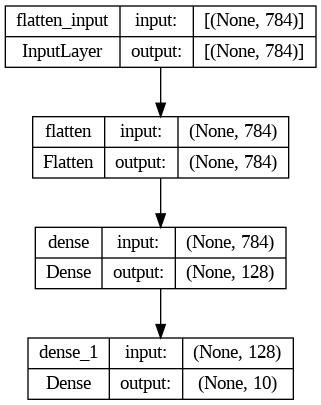

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
earlystopping = EarlyStopping(monitor = 'val_loss', restore_best_weights = True, patience = 20)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data = (X_val,y_val), callbacks=[earlystopping])


Epoch 1/100
2710/2710 [==============================] - 15s 5ms/step - loss: 0.2153 - accuracy: 0.9380 - val_loss: 0.1142 - val_accuracy: 0.9665
Epoch 2/100
2710/2710 [==============================] - 15s 6ms/step - loss: 0.0850 - accuracy: 0.9749 - val_loss: 0.0767 - val_accuracy: 0.9760
Epoch 3/100
2710/2710 [==============================] - 17s 6ms/step - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0710 - val_accuracy: 0.9780
Epoch 4/100
2710/2710 [==============================] - 15s 6ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0481 - val_accuracy: 0.9839
Epoch 5/100
2710/2710 [==============================] - 11s 4ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 6/100
2710/2710 [==============================] - 17s 6ms/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 0.0356 - val_accuracy: 0.9897
Epoch 7/100
2710/2710 [==============================] - 9s 3ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0348 - 

In [23]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

563/563 [==============================] - 2s 3ms/step - loss: 0.0357 - accuracy: 0.9924
Test Accuracy: 0.992388904094696


In [24]:
history.history.keys()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

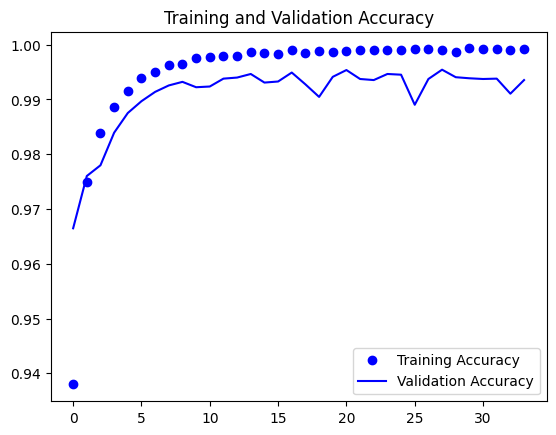

In [25]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

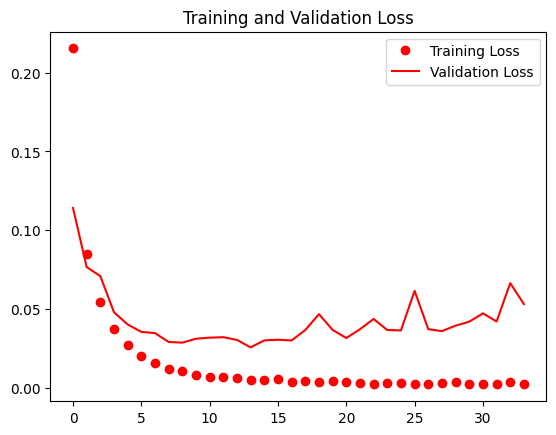

In [26]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [27]:
y_pred = np.argmax(model.predict(X_test), axis = -1)
y_true = np.argmax(y_test, axis = -1)

563/563 [==============================] - 2s 3ms/step


<Axes: >

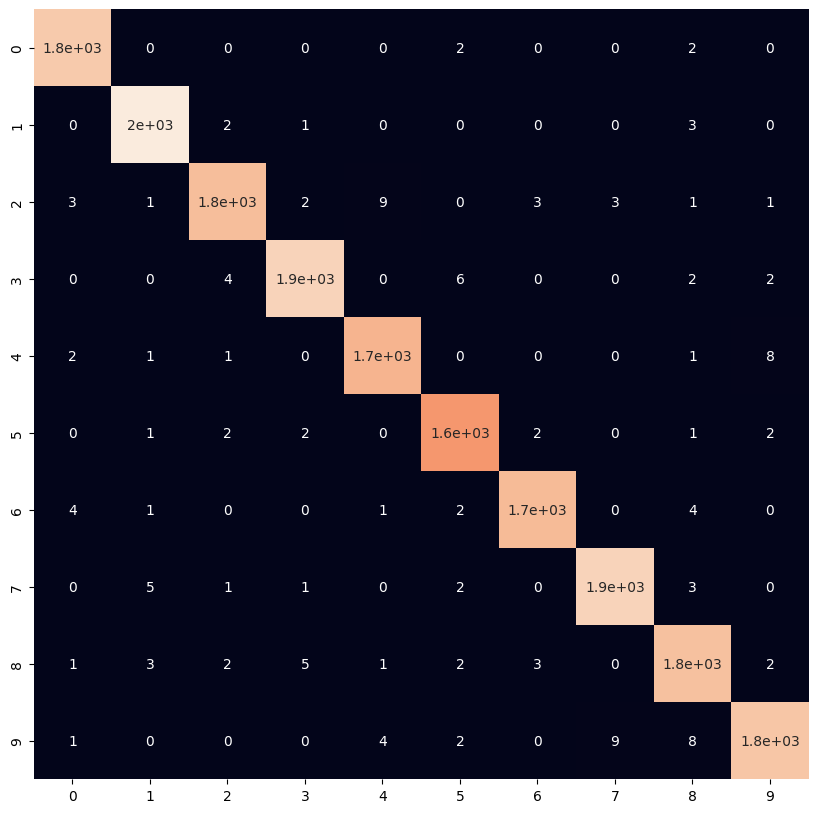

In [28]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

In [29]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1819
           1       0.99      1.00      1.00      1997
           2       0.99      0.99      0.99      1780
           3       0.99      0.99      0.99      1880
           4       0.99      0.99      0.99      1719
           5       0.99      0.99      0.99      1576
           6       1.00      0.99      0.99      1750
           7       0.99      0.99      0.99      1871
           8       0.99      0.99      0.99      1790
           9       0.99      0.99      0.99      1818

    accuracy                           0.99     18000
   macro avg       0.99      0.99      0.99     18000
weighted avg       0.99      0.99      0.99     18000



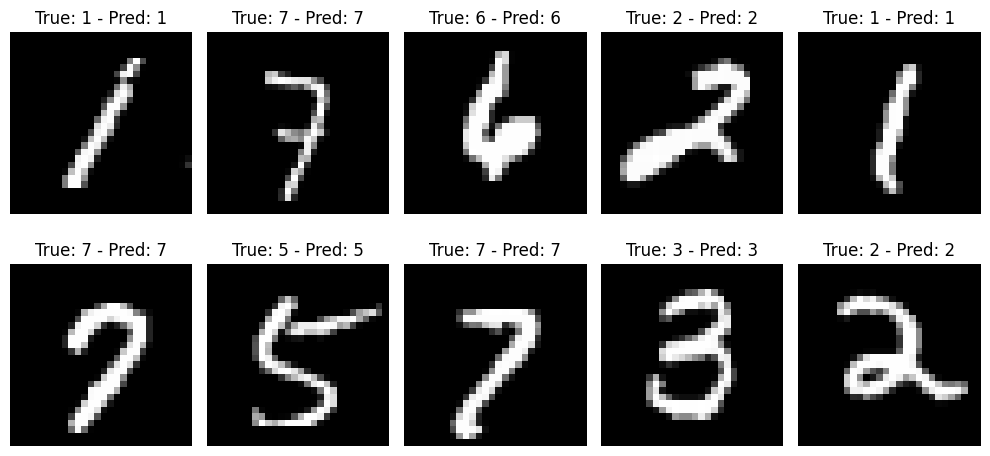

In [30]:
fig, axs = plt.subplots(2, 5, figsize = (10, 5))
for i in range (10):
  ax = axs[i // 5, i % 5]
  ax.imshow(np.array(X_test.iloc[i]).reshape(28, 28), cmap = 'gray')
  ax.set_title(f'True: {y_true[i]} - Pred: {y_pred[i]}')
  ax.axis('off')
plt.tight_layout()
plt.show()

### Architecture 2

In [31]:
X_norm = X_norm.values.reshape(-1, 28, 28, 1)
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.15, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, shuffle = True)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [32]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

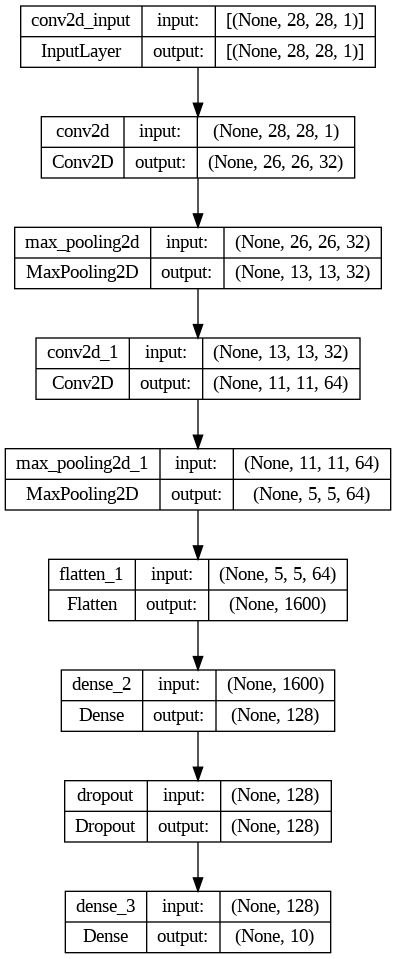

In [34]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [35]:
earlystopping = EarlyStopping(monitor = 'val_loss', restore_best_weights = True, patience = 10)

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[earlystopping])

Epoch 1/100
2710/2710 [==============================] - 106s 39ms/step - loss: 0.1700 - accuracy: 0.9485 - val_loss: 0.0439 - val_accuracy: 0.9856
Epoch 2/100
2710/2710 [==============================] - 109s 40ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0303 - val_accuracy: 0.9914
Epoch 3/100
2710/2710 [==============================] - 113s 42ms/step - loss: 0.0433 - accuracy: 0.9871 - val_loss: 0.0209 - val_accuracy: 0.9935
Epoch 4/100
2710/2710 [==============================] - 114s 42ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0192 - val_accuracy: 0.9941
Epoch 5/100
2710/2710 [==============================] - 116s 43ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0193 - val_accuracy: 0.9951
Epoch 6/100
2710/2710 [==============================] - 101s 37ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0150 - val_accuracy: 0.9955
Epoch 7/100
2710/2710 [==============================] - 109s 40ms/step - loss: 0.0187 - accuracy: 0.9942 - val_

In [38]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

563/563 [==============================] - 8s 13ms/step - loss: 0.0139 - accuracy: 0.9974
Test Accuracy: 0.9974444508552551


In [39]:
history.history.keys()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

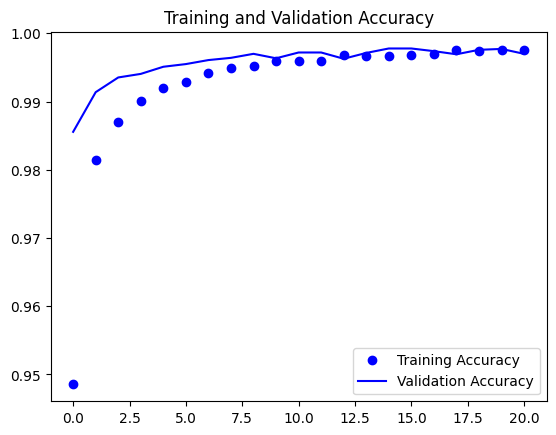

In [40]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

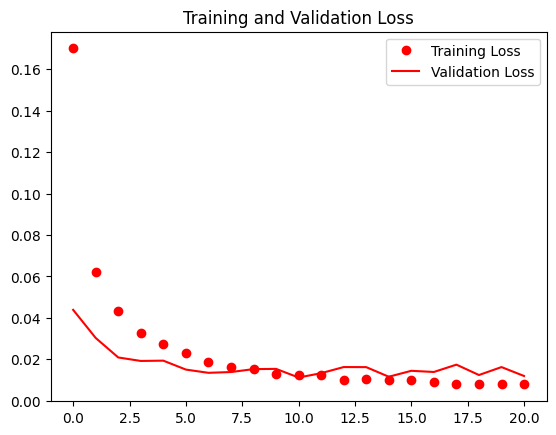

In [41]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [42]:
y_pred = np.argmax(model.predict(X_test), axis = -1)
y_true = np.argmax(y_test, axis = -1)

563/563 [==============================] - 4s 7ms/step


<Axes: >

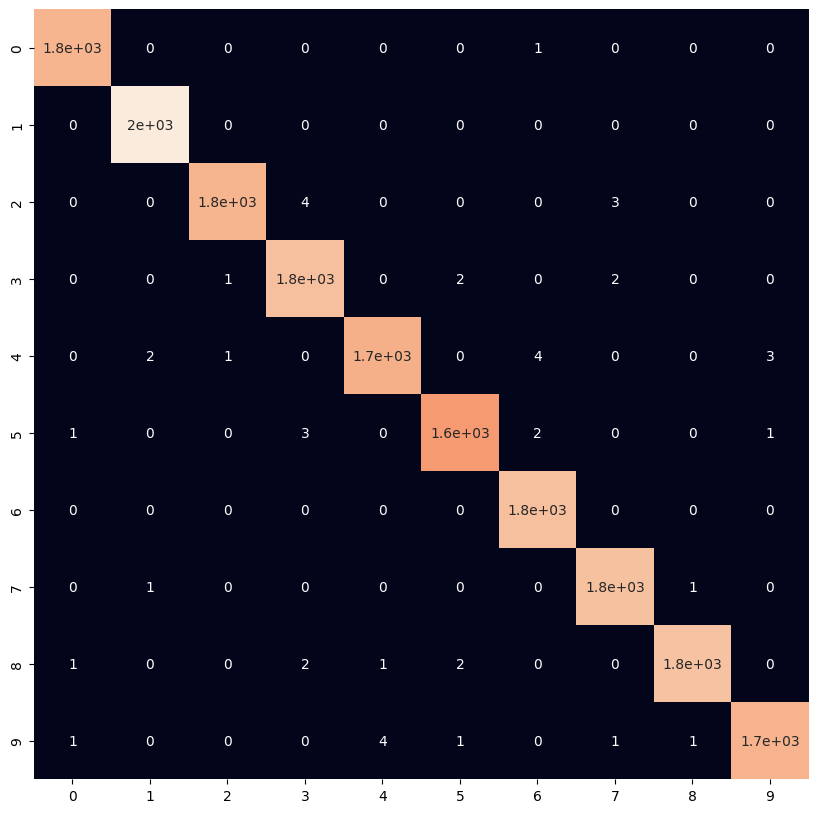

In [43]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

In [44]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1760
           1       1.00      1.00      1.00      2047
           2       1.00      1.00      1.00      1764
           3       1.00      1.00      1.00      1820
           4       1.00      0.99      1.00      1742
           5       1.00      1.00      1.00      1637
           6       1.00      1.00      1.00      1814
           7       1.00      1.00      1.00      1825
           8       1.00      1.00      1.00      1834
           9       1.00      1.00      1.00      1757

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



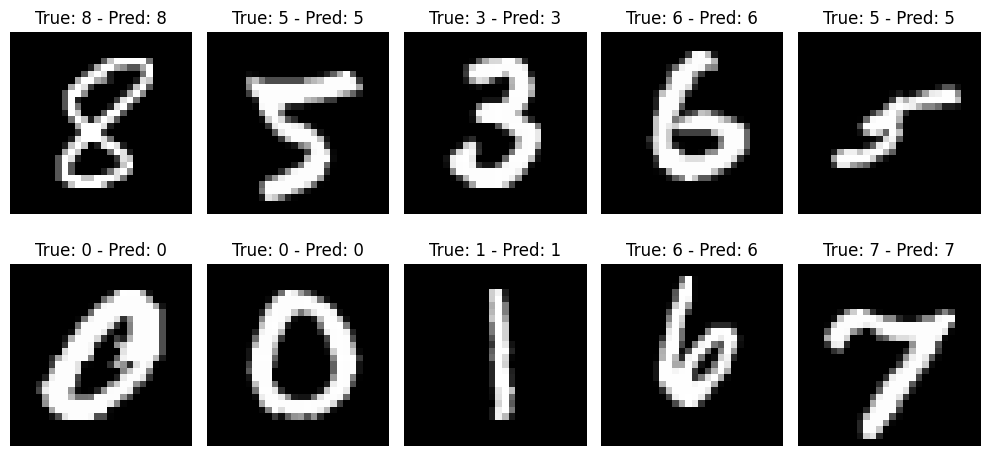

In [45]:
X_test_original = X_test.reshape(X_test.shape[0], -1)
fig, axs = plt.subplots(2, 5, figsize = (10, 5))
for i in range (10):
  ax = axs[i // 5, i % 5]
  ax.imshow(X_test_original[i].reshape(28, 28), cmap = 'gray')
  ax.set_title(f'True: {y_true[i]} - Pred: {y_pred[i]}')
  ax.axis('off')
plt.tight_layout()
plt.show()